In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np
import math as m

from astropy import constants as const
from astropy.stats import sigma_clip

from glob import glob

import reduce_dblspec 
import pipeline

from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.table import Table
from photutils import centroid_com
from scipy import asarray as ar,exp
from astropy.modeling import models, fitting



from astropy import modeling
from astropy import constants as cnst

## this notebook is to reduce data taken on May 19, 2017


# Dispersion Solutions
### RED 1.5"

In [2]:
flatid = 'DomeFlat'


'''
#generating atlas & arc graphs for wl & pixel matching

#nameing all the datafiles needed
all_side_files_red15 = 'DoubleSpec/20170519/red*.fits' #redside
atlasfiles_red15 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red15 = 'DoubleSpec/20170519/red0017.fits' #redside
linelist_red15 = reduce_dblspec.HENEAR_LINE_LIST #must be in this form cant use'henearhres.dat'-debug later

#naming pipeline output for guess_plot use
specset_red15 = pipeline.dispersion(all_side_files_red15, atlasfiles_red15, arcfiles_red15, linelist_red15,flatid)
'''

"\n#generating atlas & arc graphs for wl & pixel matching\n\n#nameing all the datafiles needed\nall_side_files_red15 = 'DoubleSpec/20170519/red*.fits' #redside\natlasfiles_red15 = fits.open('henear.fits') #NOAO atlas #redside\narcfiles_red15 = 'DoubleSpec/20170519/red0017.fits' #redside\nlinelist_red15 = reduce_dblspec.HENEAR_LINE_LIST #must be in this form cant use'henearhres.dat'-debug later\n\n#naming pipeline output for guess_plot use\nspecset_red15 = pipeline.dispersion(all_side_files_red15, atlasfiles_red15, arcfiles_red15, linelist_red15,flatid)\n"

In [3]:
'''
#collecting guesses of matching lines from above graphs

#entering (px,wl)guesses & data
pipeline.guess_plot(3025.5,9122.9674,specset_red15) #outputs (pixel guess, nearest wl/id in linelist)


#collect those guesses here ~5 seems good
pixel_guesses_red15 = [3372,3027,2375,2065,1630]
atlas_lines_red15 = [9657.78,9122.9674,8115.31,7635.1,6965.43]
guesses_red15 = list(zip(pixel_guesses_red15, atlas_lines_red15)) #making tuples to pass into fcn later
'''

'\n#collecting guesses of matching lines from above graphs\n\n#entering (px,wl)guesses & data\npipeline.guess_plot(3025.5,9122.9674,specset_red15) #outputs (pixel guess, nearest wl/id in linelist)\n\n\n#collect those guesses here ~5 seems good\npixel_guesses_red15 = [3372,3027,2375,2065,1630]\natlas_lines_red15 = [9657.78,9122.9674,8115.31,7635.1,6965.43]\nguesses_red15 = list(zip(pixel_guesses_red15, atlas_lines_red15)) #making tuples to pass into fcn later\n'

In [4]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

#ds_red15 = pipeline.goodness_of_matches(arcfiles_red15,guesses_red15,all_side_files_red15,atlasfiles_red15,linelist_red15,flatid)

### RED 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


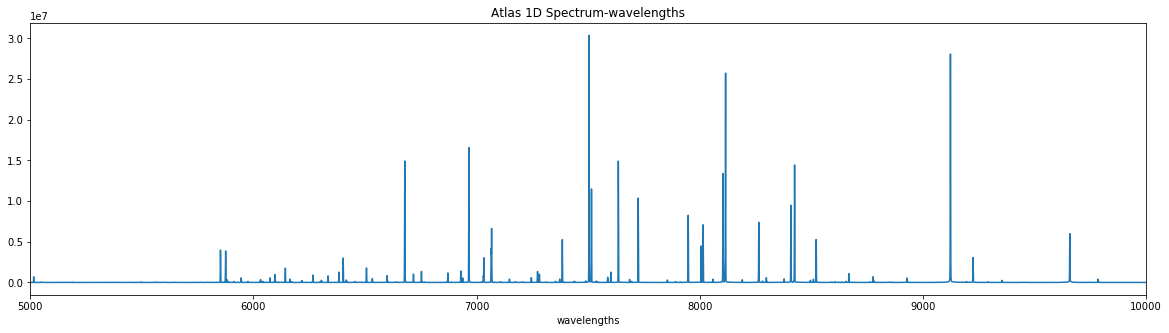

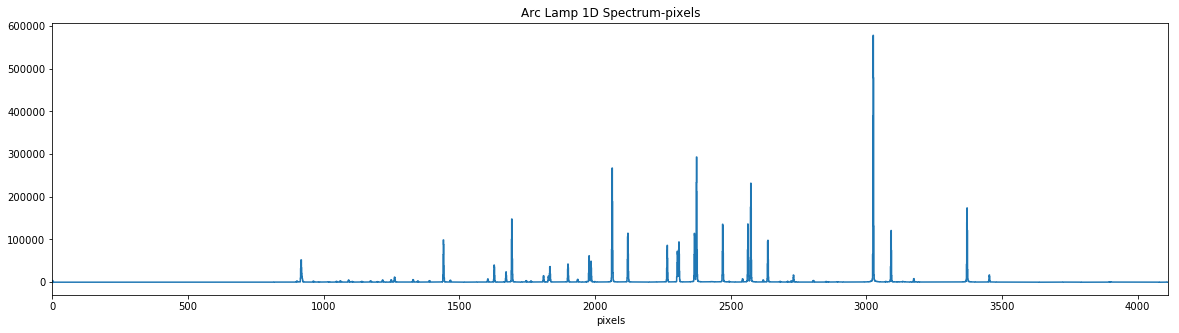

In [5]:
#nameing all the datafiles needed
all_side_files_red10 = 'DoubleSpec/20170519/red*.fits' #redside
atlasfiles_red10 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red10 = 'DoubleSpec/20170519/red0012.fits' #redside
linelist_red10 = reduce_dblspec.HENEAR_LINE_LIST

specset_red10 = pipeline.dispersion(all_side_files_red10, atlasfiles_red10, arcfiles_red10, linelist_red10,flatid)

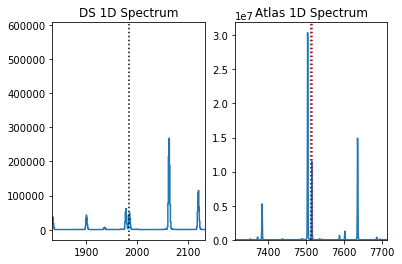

In [6]:
#collecting guesses of matching lines from above graphs

#entering(px,wl)guesses & data
pipeline.guess_plot(1983,7513,specset_red10) #outputs (pixel guess, nearest wl/id in linelist)

#collect guesses here ~5 seems good
pixel_guesses_red10 = [2373,2062,1672,3370,3090,2573,1977,1983]#3024
atlas_lines_red10 = [8115.311,7635.106,7032.4131,9657.7863,9224.4992,8424.6475,7503.8691,7514.6518]#9122.9674,
guesses_red10 = list(zip(pixel_guesses_red10, atlas_lines_red10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Failed to find line ArI at wl=8014.7857: "Guessed line's peak to base ratio is 9.318175819338679, which is less than 10"
Failed to find line KrI at wl=8059.5038: "Guessed line's peak to base ratio is 1.0071667230703627, which is less than 10"
Failed to find line ArI at wl=8103.6931: "Guessed line's peak to base ratio is 6.8475247205142615, which is less than 10"
Found line ArI at wl=8115.311
Clipped 0 lines
Failed to find line KrI at wl=8190.0543: "Guessed line's peak to base ratio is 0.989665427804739, which is less than 10"
Failed to find line ArI at wl=8264.5225: "Guessed line's peak to base ratio is 7.871156695322143, which is less than 10"
Failed to find line KrI at wl=8281.0495: "Tried to find peak at 2481.0913838718748 but it's in a valley, not a peak"
Failed to find line NeI at wl=8377.6065: "Guessed line's peak to base ratio is 6.2129642202481365, which is less than 10"
Failed to find line ArI at wl=8408.2096: "Guessed line's peak to base ratio is 8.944773825102423, which is l

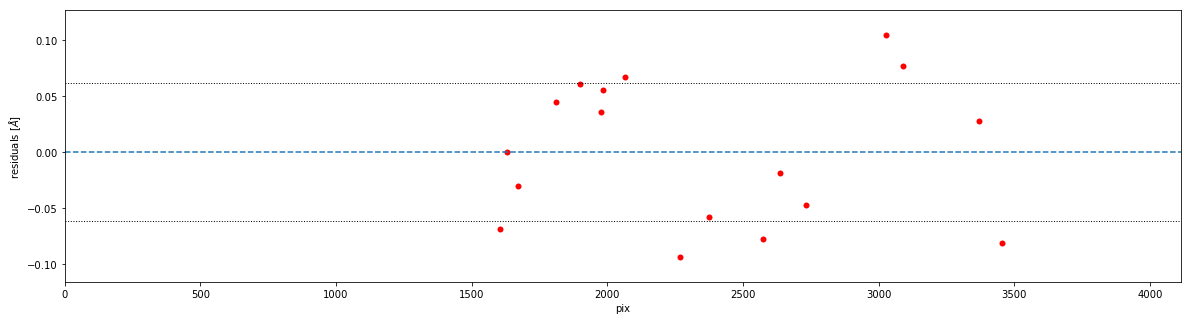

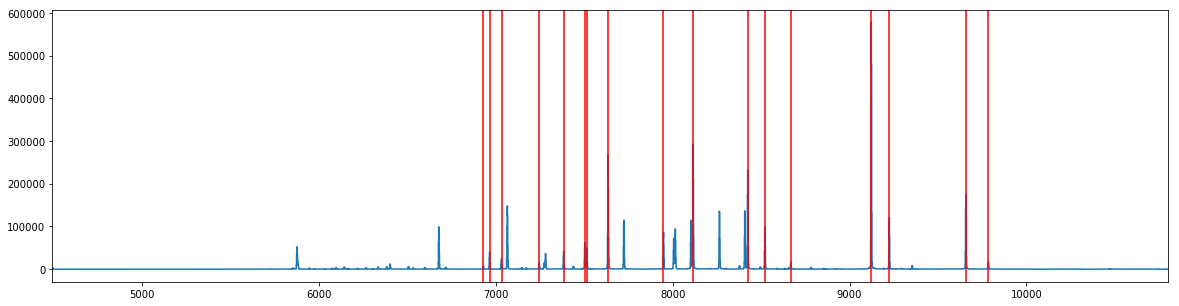

In [7]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

ds_red10 = pipeline.goodness_of_matches(arcfiles_red10,guesses_red10,all_side_files_red10,atlasfiles_red10,linelist_red10,flatid)

### BLUE 1.5"

In [8]:
'''
all_side_files_blue15 = 'DoubleSpec/20170519/blue*.fits' #blueside
atlasfiles_blue15 = fits.open('fear.fits') #NOAO atlas #blueside
arcfiles_blue15 = 'DoubleSpec/20170519/blue0018.fits' #blueside
linelist_blue15 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later

specset_blue15 = pipeline.dispersion(all_side_files_blue15, atlasfiles_blue15, arcfiles_blue15, linelist_blue15,flatid)
'''

"\nall_side_files_blue15 = 'DoubleSpec/20170519/blue*.fits' #blueside\natlasfiles_blue15 = fits.open('fear.fits') #NOAO atlas #blueside\narcfiles_blue15 = 'DoubleSpec/20170519/blue0018.fits' #blueside\nlinelist_blue15 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later\n\nspecset_blue15 = pipeline.dispersion(all_side_files_blue15, atlasfiles_blue15, arcfiles_blue15, linelist_blue15,flatid)\n"

In [9]:
''' 

pipeline.guess_plot(2088,3581,specset_blue15) #(px,wl)

#collect guesses here but comment them out to see output of matches from line above
pixel_guesses_blue15 = [529,995,1655,1958,2088]
atlas_lines_blue15 = [5269.5366,4764.8646,4044.4179,3719.9346,3581.1925] 

guesses_blue15 = list(zip(pixel_guesses_blue15, atlas_lines_blue15)) #making tuples to pass into fcn later
'''

' \n\npipeline.guess_plot(2088,3581,specset_blue15) #(px,wl)\n\n#collect guesses here but comment them out to see output of matches from line above\npixel_guesses_blue15 = [529,995,1655,1958,2088]\natlas_lines_blue15 = [5269.5366,4764.8646,4044.4179,3719.9346,3581.1925] \n\nguesses_blue15 = list(zip(pixel_guesses_blue15, atlas_lines_blue15)) #making tuples to pass into fcn later\n'

In [10]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution
#produces .3 residuals - not the best but good RD for a wrong DS



#ds_blue15 = pipeline.goodness_of_matches(arcfiles_blue15,guesses_blue15,all_side_files_blue15,atlasfiles_blue15,linelist_blue15,flatid) #yay looks good FINALLY!!

### BLUE 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Blue side


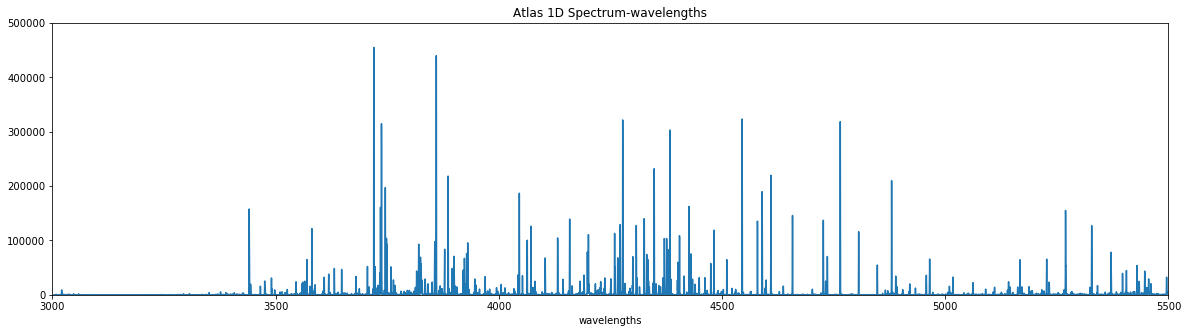

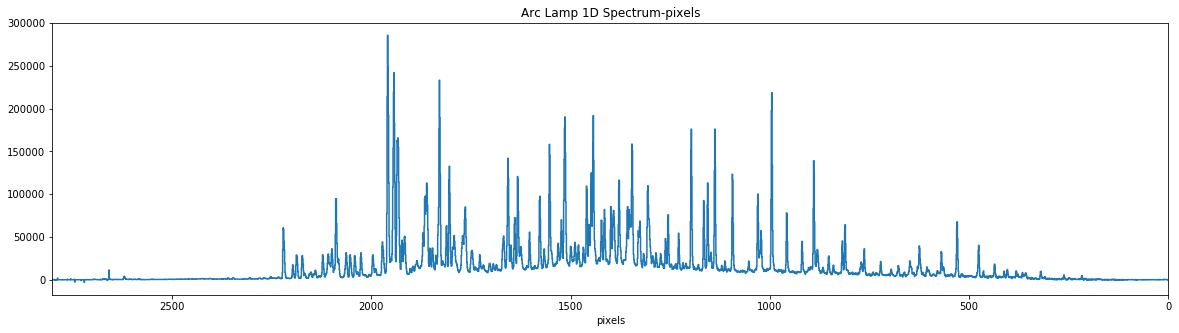

In [11]:
all_side_files_blue10 = 'DoubleSpec/20170519/blue*.fits' #blueside
atlasfiles_blue10 = fits.open('fear.fits') #NOAO atlas #blueside
arcfiles_blue10 = 'DoubleSpec/20170519/blue0011.fits' #blueside
linelist_blue10 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later

specset_blue10 = pipeline.dispersion(all_side_files_blue10, atlasfiles_blue10, arcfiles_blue10, linelist_blue10,flatid)



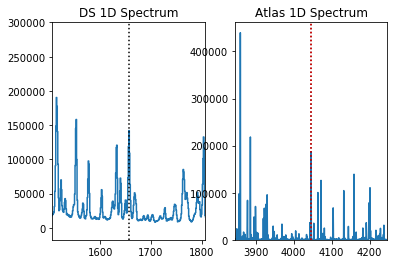

In [12]:
pipeline.guess_plot(1656,4046,specset_blue10) #(px,wl)

#collect guesses here but comment them out to see output of matches from line above
pixel_guesses_blue10 = [529,995,2088,1958] #,1657
atlas_lines_blue10 = [5269.5366,4764.8646,3581.1925,3719.9346] #,4045.8130

guesses_blue10 = list(zip(pixel_guesses_blue10, atlas_lines_blue10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for blueside
chose guesses for blueside
Failed to find line FeI at wl=3020.6391: "Tried to find peak at 2623.7225827443517 but it's in a valley, not a peak"
Failed to find line FeI at wl=3024.0325: "Guessed line's peak to base ratio is 4.533538339451221, which is less than 5"
Failed to find line FeI at wl=3037.3887: "Guessed line's peak to base ratio is 1.2893355075313695, which is less than 5"
Failed to find line FeI at wl=3047.6043: "Tried to find peak at 2597.501394839253 but it's in a valley, not a peak"
Failed to find line FeI at wl=3057.4456: "Tried to find peak at 2587.9457522100497 but it's in a valley, not a peak"
Failed to find line FeI at wl=3059.0856: "Guessed line's peak to base ratio is 2.794947833283675, which is less than 5"
Failed to find line FeI at wl=3225.785: "Guessed line's peak to base ratio is 1.4190035946857171, which is less than 5"
Failed to find line ArII at wl=3243.6887: "Guessed line's peak to base ratio is 1.4129564785379853, which is less than 5

Failed to find line ArI at wl=4044.4179: "Guessed line's peak to base ratio is 2.9822565901403584, which is less than 5"
Failed to find line FeI at wl=4045.813: "Guessed line's peak to base ratio is 2.9822565901403584, which is less than 5"
Failed to find line ArII at wl=4052.9208: "Guessed line's peak to base ratio is 2.654010032130634, which is less than 5"
Found line FeI at wl=4063.5939
Clipped 0 lines
Failed to find line ArII at wl=4103.9121: "Guessed line's peak to base ratio is 3.840732083696764, which is less than 5"
Failed to find line FeI at wl=4118.5442: "Guessed line's peak to base ratio is 1.562007151236431, which is less than 5"
Found line ArII at wl=4131.7235
Clipped 0 lines
Failed to find line FeI at wl=4143.8688: "Guessed line's peak to base ratio is 4.223757083884537, which is less than 5"
Found line ArI at wl=4158.5905
Clipped 0 lines
Failed to find line ArI at wl=4164.1795: "Guessed line's peak to base ratio is 1.2968079720972707, which is less than 5"
Found line FeI

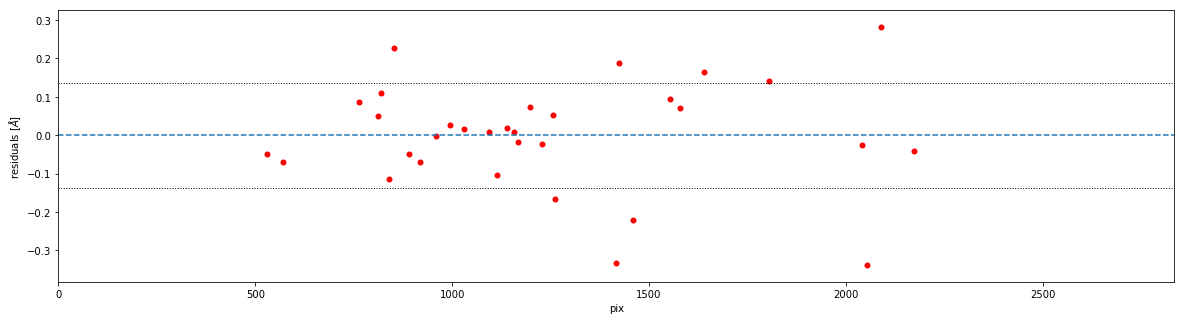

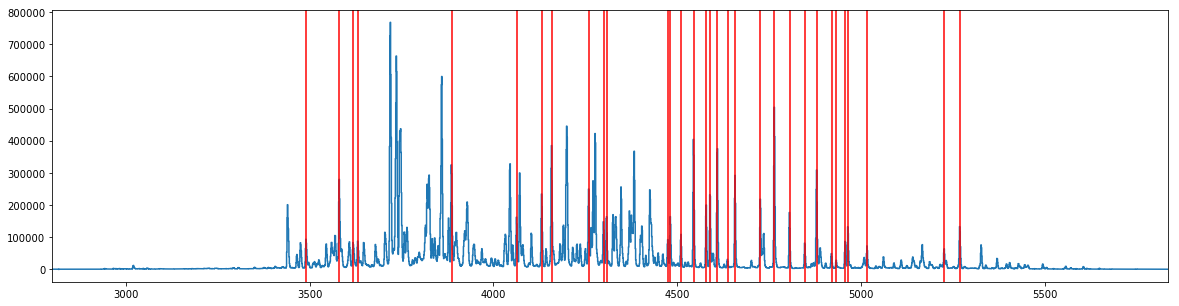

In [13]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution
#again BAD residuals .3 but good enough for a wrong DS
ds_blue10 = pipeline.goodness_of_matches(arcfiles_blue10,guesses_blue10,all_side_files_blue10,atlasfiles_blue10,linelist_blue10,flatid) #yay looks good FINALLY!!

# Reducing targets

In [14]:
#collecting all target ids from this night here to condense
''' ALL 1.0"
57607497318756-StarTrek ---- this is ST-1
57607497515484-StarTrek ---- this is ST-2
68298203070473-ScoobyDoo ---- this is SD-2
65565541728490-Gilgamesh ---- this is G-1
62698115432544-Odyssey ---- this is ody-3
62224092496776-Odyssey ---- this is ody-8
79996084617517-OBrother ---- this is ob-3
80066954264778-OBrother ---- this is ob-2
'''

' ALL 1.0"\n57607497318756-StarTrek ---- this is ST-1\n57607497515484-StarTrek ---- this is ST-2\n68298203070473-ScoobyDoo ---- this is SD-2\n65565541728490-Gilgamesh ---- this is G-1\n62698115432544-Odyssey ---- this is ody-3\n62224092496776-Odyssey ---- this is ody-8\n79996084617517-OBrother ---- this is ob-3\n80066954264778-OBrother ---- this is ob-2\n'

## ST-1 has a unique problem with misnaming so this is kinda like ST-2 as well

In [15]:
'''
fitsobj = open('/path/to/file.fits')
hdr = fitsobj.header

hdr['OBJECT'] = 'new_name_for_the_obj'
... now do whatever else is needed]

'''

#trying to fix name problems for individual ST2 files FOR EACH SIDE
#57607497318756-StarTrek is ST1
#57607497515484-StarTrek is ST2

#RED SIDE

#tells what files i want 
fitsobj1 = fits.open('DoubleSpec/20170519/red0071.fits')
fitsobj2 = fits.open('DoubleSpec/20170519/red0072.fits')
fitsobj3 = fits.open('DoubleSpec/20170519/red0073.fits')
hdr1 = fitsobj1[0].header
hdr2 = fitsobj2[0].header
hdr3 = fitsobj3[0].header

#changes the names within those files
hdr1['OBJECT'] = '57607497318756-StarTrek'
hdr2['OBJECT'] = '57607497318756-StarTrek'
hdr3['OBJECT'] = '57607497318756-StarTrek'

#hdr3 #checking did it
#rewriting so that 3 files only saved for each target
fitsobj1.writeto('DoubleSpec/20170519/red0071.fits',overwrite=True)
fitsobj2.writeto('DoubleSpec/20170519/red0072.fits',overwrite=True)
fitsobj3.writeto('DoubleSpec/20170519/red0073.fits',overwrite=True)

#BLUE SIDE----------------------------------------------------

#tells what files i want 
fitsobj1blue = fits.open('DoubleSpec/20170519/blue0071.fits')
fitsobj2blue = fits.open('DoubleSpec/20170519/blue0072.fits')
fitsobj3blue = fits.open('DoubleSpec/20170519/blue0073.fits')
hdr1blue = fitsobj1blue[0].header
hdr2blue = fitsobj2blue[0].header
hdr3blue = fitsobj3blue[0].header

#changes the names within those files
hdr1blue['OBJECT'] = '57607497318756-StarTrek'
hdr2blue['OBJECT'] = '57607497318756-StarTrek'
hdr3blue['OBJECT'] = '57607497318756-StarTrek'

#rewriting so that 3 files only saved for each target
fitsobj1blue.writeto('DoubleSpec/20170519/blue0071.fits',overwrite=True)
fitsobj2blue.writeto('DoubleSpec/20170519/blue0072.fits',overwrite=True)
fitsobj3blue.writeto('DoubleSpec/20170519/blue0073.fits',overwrite=True)

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located
choose 2D spec for blueside
choose 1D target spec axis limits for blueside


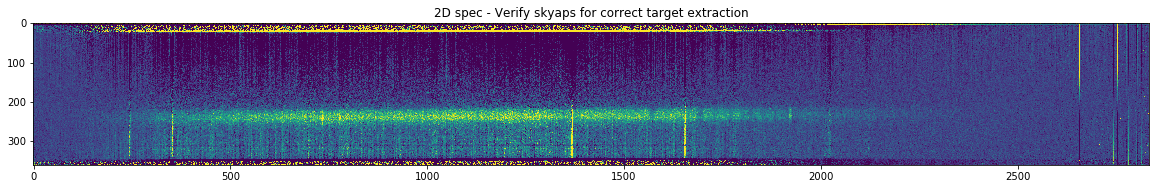

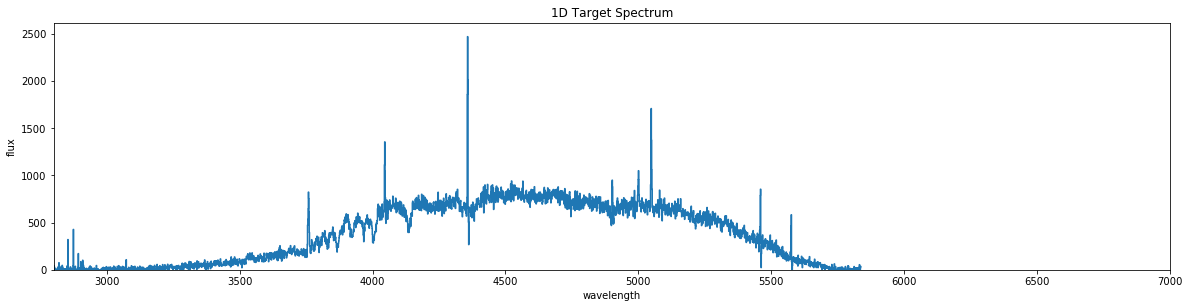

In [16]:
#now this is ST1 only
#naming files needed
#BLUE
#FIXED-this particular one has a problem b/c it was misnamed '57607497515484-StarTrek' instead of '57607497318756-StarTrek'
targetID_blue10_ST1 = '57607497318756-StarTrek'
skyaps_blue10 = [(160,200),(285,355)]
all_side_files_target_blue = 'DoubleSpec/20170519/blue*.fits' #BLUEside
vmax=40
vmin=-10
model='linear'
flatid='DomeFlat'
specaps=(215,250)
flux_ST1,unc_ST1,subimg_ST1 = pipeline.sky_subtract(targetID_blue10_ST1,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target_blue,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
#ST_1_blue = Table([flux_ST1,unc_ST1], names=('flux','unc'))

#plt.figure(figsize=(5,5))


In [17]:
#ignore, needed to explore which files where named with wrong target according to log

t=fits.open('DoubleSpec/20170519/red0071.fits')
#t[0].header
#71: 57607497515484-StarTrek
#72: 57607497515484-StarTrek
#73: 57607497515484-StarTrek
#74: 57607497515484-StarTrek Hg
#75: 57607497515484-StarTrek
#76: 57607497515484-StarTrek
#77: 57607497515484-StarTrek
#78: 57607497515484-StarTrek
#79: 57607497515484-StarTrek
#80: 57607497515484-StarTrek Hg


In [18]:
#RED----lots of noise maybe have to ask erik b/c it wont be perfect with wrong ds but this bad?


#this ones interesting b/c the raw files show single skinny spectra (looks like a star) only and pixel locations
#dont match this image produced to determine specaps, target too faint unless stacked and raw vs this inverted
#ie stars spec on raw ~100s, on this ~300s, thought blue should be inverted not red?


''' 
targetID_red10_ST1 = '57607497318756-StarTrek'
skyaps_red10 = [(75,110),(210,355)]
all_side_files_target_red = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(130,170)
model=('poly',4)
flux_ST1_red,unc_ST1_red, comb_ST1_red = pipeline.sky_subtract(targetID_red10_ST1,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target_red,flatid,specaps,vmax,vmin,model)
'''

" \ntargetID_red10_ST1 = '57607497318756-StarTrek'\nskyaps_red10 = [(75,110),(210,355)]\nall_side_files_target_red = 'DoubleSpec/20170519/red*.fits' #redside\nspecaps=(130,170)\nmodel=('poly',4)\nflux_ST1_red,unc_ST1_red, comb_ST1_red = pipeline.sky_subtract(targetID_red10_ST1,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target_red,flatid,specaps,vmax,vmin,model)\n"

#### OIII line best to use on blue side b/c altho halpha visible its lower than the noise on the
#### longer wavelengths so need to fix skysubt to get noise below signal b4 can justify use


# Starting 2nd reduction technique for rot.curves

In [19]:
#need this for 2d only extraction (pipeline modification)
def sky_subtract(comb,skyaps,model):    
    #plotting 2D to get skyaps right around the target
    plt.figure(figsize=(10,25)) #setting up fig size
    value = model[1]
    if model == 'linear':
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Linear1D(1,0)) #(1,0)
    elif model == ('poly',value):
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Polynomial1D(value)) #Linear1D(1/10,10)) #(1,0)
    elif model == ('combined',value):
        mymodel=(modeling.models.Polynomial1D(value) + modeling.models.Linear1D(1,0))
        subimg, models = comb.subtract_sky(skyaps, skymodel=mymodel)
    elif model == None:
        subimg, models = comb.subtract_sky(skyaps, skymodel=None)#subtracts mean
    else:
        print ("Model type or polynomial degree not recognized")
    return (subimg, comb, models)    #subtracted2D, original, fitted models per row

(1365, 1374)

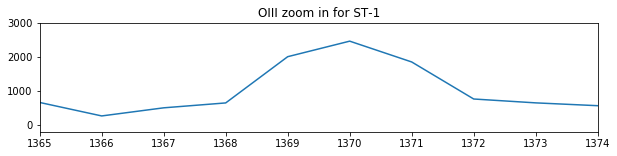

In [20]:
#quick spectral pix range estimate from 1D spectrum
plt.figure(figsize=(10,2))
plt.plot(flux_ST1)
plt.title('OIII zoom in for ST-1')
plt.ylim(-200,3000)
plt.xlim(1365,1374) #1287-1295

#plt.ylim(-200,1000)
#plt.xlim(6600,6650)

In [21]:
#setup to extract 2D only (uses pipeline modification)


#stacking all those instrument-noise-subtracted target data files-help increase s/n 
atlasfiles = fits.open('fear.fits') #use for creating dispersion solution later 

#determing what instumentation noise is
flats = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim() for fn in 
          reduce_dblspec.find_all_obj(flatid,'DoubleSpec/20170519/blue*.fits')[:10]] #DO I WANNA KEEP AS ONLY LAST 10???
nfl = reduce_dblspec.create_normalized_flat(flats)   
header = atlasfiles[0].header    
    
#locating all files w/ the target & instrumentation noise subtraction
specs = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim().flatten(nfl) 
          for fn in reduce_dblspec.find_all_obj(targetID_blue10_ST1,all_side_files_target_blue)]
#specs is the inst. noise subtracted group of files with data from target    
    
print("This is lenspecs:",len(specs))
comb = reduce_dblspec.combine_imgs(specs) #comb-all files data from target stacked
#model=('poly',3)
model=('linear')


subimg2, comb2, fitmodels = sky_subtract(comb,skyaps_blue10,model)
#subimg2 is sky-subtracted, instumentation noise subtracted, 


/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


This is lenspecs: 3


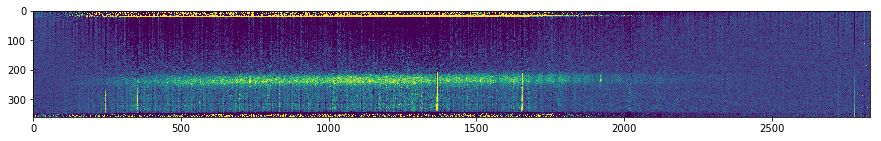

In [22]:
#expoloring transpose issues btwn 1D reduction & modified pipeline reduction???
plt.figure(figsize=(15,10))
subimg2.show_image(transpose=True,vmax=vmax,vmin=vmin) #replace as vmax=40,vmin=-10 if this doesnt work out well
#plt.ylim(150,350)

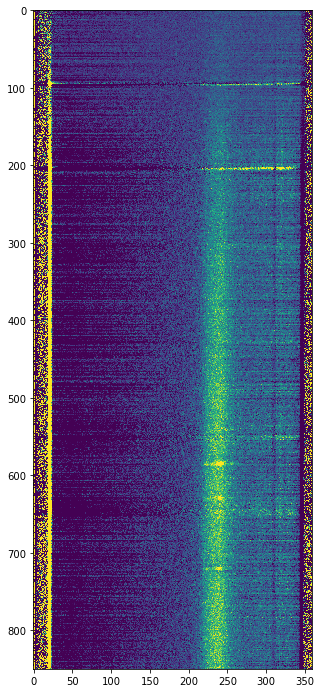

In [23]:
#to zoom into right wl region of OIII
plt.figure(figsize=(5,15))
plt.imshow(subimg2.data[150:1000][::],vmin=vmin, vmax=vmax)

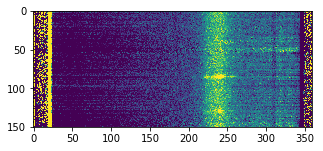

In [24]:
#to zoom into right wl region of OIII


#plt.plot(subimg2.data);
plt.figure(figsize=(5,15))
plt.imshow(subimg2.data[650:800][::],vmin=vmin, vmax=vmax)

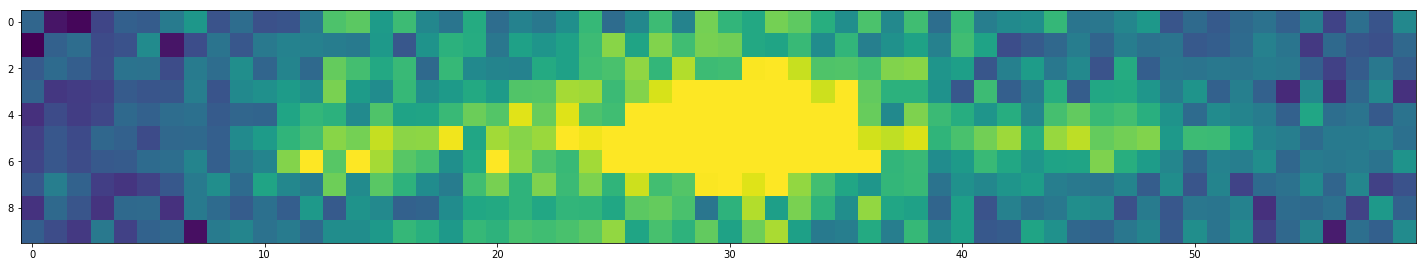

In [25]:
#2d ha region in pixels (from pipeline modification)

plt.figure(figsize=(25,25))
#testingthis=subimg2.data[1363:1378,155:280] #[spectralrange,spatialrange]#for blue side
testingthis=subimg2.data[730:740,210:270] 


vmin=-10
vmax=45
plt.imshow(testingthis,vmin=vmin,vmax=vmax)
#print('SPECTRAL H-alpha wl range in pix: 1289:1295;') #w/o missing 3 wl's , to use with flux data - 3
#print('SPACE Target spatial range in pix space: 105:195')

## getting galaxy core using full continuum


subimg2 shape: (2835, 360)
flux data shape (61, 2815)
MISSING   20    STARTS    FROM    HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


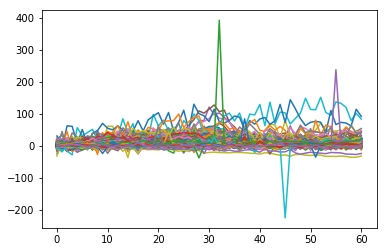

In [26]:
#getting gal core pix...PART ONE ##SPACE CORE

target_aperature=(210,270) #target location in space
target_wl_range=(730,740)

flux_data=[] #empty list to hold target 2d spec
apslc = np.arange(target_aperature[0],target_aperature[1]+1,1) #makes list for which rows to extracct spec from
#print (apslc) #as expected, +1 so doesnt cut off last value


print('subimg2 shape:',np.shape(subimg2.data))#(2835,360)blue#(440, 4114)red
for i in apslc:
    spec = subimg2.data.T[i]#[:-200][i]#subimg2 is sky-subtracted 2D spec #this is every row's spec...cutting wl ossc.s
    #plt.figure(figsize=(20,10))
    #plt.plot(spec)
    #print('first spec',np.shape(spec))
    #need to change if suming multiple pixel rows
    #print(np.shape(spec))
    spec = spec[::][10:-10] #chops first 3 flux values in spectral (wl) direction-crazy osscillations
    #print('second spec',np.shape(spec))
    flux_data.append(spec) #collects a list of every row's spec within the target location
flux_data=np.array(flux_data)
print('flux data shape',np.shape(flux_data))
plt.plot(flux_data);
wl_pix_correction = 20
print('MISSING   20    STARTS    FROM    HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

flux1 2815 flux2 2815 flux3 2815 shape (61, 2815)
shape (61, 1)
x: 0.0 y: 28.905572568 y is the spectral core location still in pixels & in the Reduced spectral range
to get full plate scale pix value add 210 and 3 from 1D spec cut due to oscillations
GALAXY CORE (based on entire red side plate scale) IS AT SPATIAL PIXEL: 238.905572568
SPACE_PIX_CORRECTION DEFINED HERE!!!!!!!


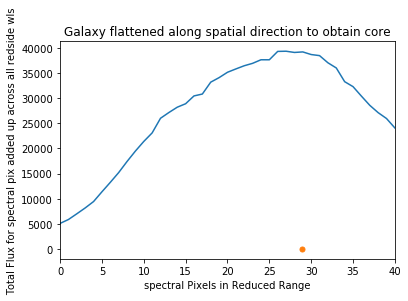

In [27]:
 #getting gal spatial core pix...PART TWO  ##SPACE CORE

#flattening to be along spectral direction (histogram like)
flux_array = np.sum(flux_data,axis=1) #explicitly making an array
flux_array2d = flux_array[:, np.newaxis] #need 2d for centroiding
print('flux1',len(flux_data[0]),'flux2',len(flux_data[1]),'flux3',len(flux_data[2]),'shape',np.shape(flux_data))
#plt.plot(flux_data)

print('shape',np.shape(flux_array2d))
x_galcore, y_galcore = centroid_com(flux_array2d) #actually doing the centroiding

#plotting
plt.plot(flux_array2d);
plt.plot(y_galcore, x_galcore ,'.',markersize=10)
plt.xlabel('spectral Pixels in Reduced Range')
plt.ylabel('Total Flux for spectral pix added up across all redside wls')
plt.title('Galaxy flattened along spatial direction to obtain core')
space_pix_correction = target_aperature[0] 
spatial_core_pix = y_galcore + space_pix_correction #(adds 105 to correct from target extraction),(DONT need 3 from oscillations doesnt affect this b/c of spectral collapse in sum)
#plt.xlim(10,350)
plt.xlim(0,40)

#conclusions
print('x:',x_galcore,'y:',y_galcore, 'y is the spectral core location still in pixels & in the Reduced spectral range')
print('to get full plate scale pix value add {:} and 3 from 1D spec cut due to oscillations'.format(target_aperature[0]))
print('GALAXY CORE (based on entire red side plate scale) IS AT SPATIAL PIXEL:',spatial_core_pix)
print('SPACE_PIX_CORRECTION DEFINED HERE!!!!!!!')




## getting galaxy core using regions around OIII


flux_data shape (61, 2815)
shape of first section: (61, 25) matches shape of second section: (61, 25)
shape of first section 2d: (61, 1)
shape of second section 2d: (61, 1)
first section centroid x,y: 0.0 30.165579715
second section centroid x,y: 0.0 29.5873277803
This is the average pixel value of the core BEFORE spatial cutout corrections 29.8764537477
Pixel Value of core along spatial axis wrt full CCD size 239.876453748


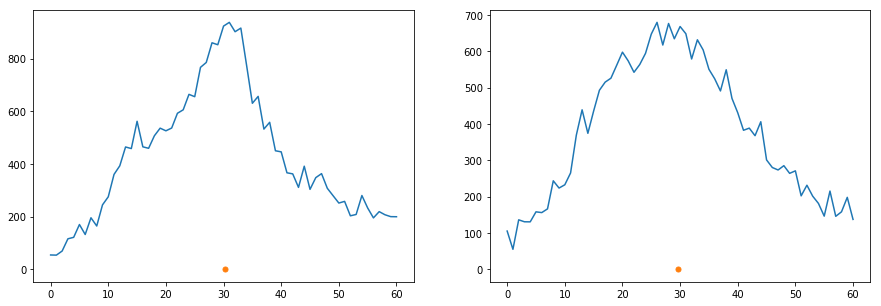

In [28]:
#USING SECTIONS SURROUNDING OIII WL RANGE
print('flux_data shape',np.shape(flux_data))#(226,4104) #note that this is missing those 10 wl's
#also note flux_data is continuum subtracted

#below for reference

#making arrays surrounding OIII
upperOIII = 740
lowerOIII = 730
width_sections = 25
upper_one = lowerOIII - 1 #just to give it some distance
lower_one = upper_one - width_sections
lower_two = upperOIII + 1 #needed more distance (near&below core H-alpha leaks into this range so IF change ha range then make this 5 a 1 )
upper_two = lower_two + width_sections
first_section = flux_data[:,lower_one:upper_one]
second_section = flux_data[:,lower_two:upper_two]
print('shape of first section:', np.shape(first_section), 'matches shape of second section:', np.shape(second_section))
#plt.plot(second_section[120]); #tried many diff row values for both sections here - satisified correct


#collapsing both sections in the spatial direction (histogram like)
first_section_sum = np.sum(first_section,axis=1) 
first_section2d = first_section_sum[:,np.newaxis] #2d required to centroid
second_section_sum = np.sum(second_section,axis=1)
second_section2d = second_section_sum[:,np.newaxis] #2d required to centroid
print('shape of first section 2d:', np.shape(first_section2d))
print('shape of second section 2d:', np.shape(second_section2d))


#does the centroiding
x_first, y_first = centroid_com(first_section2d)
x_second, y_second = centroid_com(second_section2d)
print('first section centroid x,y:',x_first,y_first)
print('second section centroid x,y:',x_second,y_second)



#verify by plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(first_section2d);
ax2.plot(second_section2d);
#note below had to reverse xy centroids to visualize correctly, not sure why it inverted tho...
ax1.plot(y_first,x_first, '.', markersize=10)
ax2.plot(y_second,x_second, '.', markersize=10)

#averaging the two core values, the y's
core_array = np.array([y_first,y_second])
core_avgcentroids = np.mean(core_array)
print('This is the average pixel value of the core BEFORE spatial cutout corrections',core_avgcentroids)

#corrections to pixel value of avg section core
core_from_sections = core_avgcentroids + space_pix_correction #corrects for spatial axis target cutout
print('Pixel Value of core along spatial axis wrt full CCD size',core_from_sections)





## Centroiding OIII within target


In [29]:


#below for reference, uses full ccd wl range - first defined when applied DS
wl = np.array(ds_blue10.pixtowl(np.arange(len(subimg2.data.T[::][0]))))
wl_shorter2 = wl[730:740] #isolate wl around h-alpha using full ccd plate wl range formerly 1387:1400
new_short = flux_data[:,730:740]
wl_pix_correction_wo_oscill = target_wl_range[0] - wl_pix_correction #wl_pix_correction is the oscillations

means_unc=[]
means=[]
print('should be blank',means)
stddev = []
gfit_vals = []
mylist2 = []
mylist_ys2 = []
holding2 = []
ha_wls2 = []


#gets OIII centroids in target gal's range
for row in new_short: 
    #calculates centroids per row
    flux_fake2d2 = row[np.newaxis, :] #makes each row array into a fake2d
    print('row?',flux_fake2d2)
    mylist4, mylist5 = centroid_com(flux_fake2d2)#finds center(x,y) of halpha for each row array
    #print(mylist4) #, mylist5)
    #holding_arr2 = row, wl_shorter2
    #xarr = np.array([row,wl_shorter2])
    mylist_ys2.append(mylist5)
    mylist2.append(mylist4) #collects all halpha centers/centroids per row
    
    #calculating errors per row via gaussian fit
    x = ar(range(len(row)))
    y = row
    mean = mylist4
    g_init = models.Gaussian1D(amplitude=max(y), mean=mean, stddev=2.)
    fit_g = fitting.LevMarLSQFitter()
    gaussian = fit_g(g_init, x, y)
    #print('mean', gaussian.mean)
    means.append(gaussian.mean.value)
    gfit_vals.append(gaussian)
    stddev.append(gaussian.stddev.value) #
    
    #trying to get uncertainities per row via covariance matrix
    gaussian.param_cov = fit_g.fit_info['param_cov']
    #mytest = fit_g.fit_info['param_cov'][1][1]
    means_unc.append(fit_g.fit_info['param_cov']) #save the whole matrix and extract middle term via for loop below
    #means_unc.append(fit_g.fit_info['param_cov'][1][1]) #dont know why this doesnt work
    
 #end of for loop   
gfit_vals = np.array(gfit_vals) 
#print(mytest)
print('lenght of means_unc is:', len(means_unc))
#print('means_unc type',type(means_unc),'means_unc', means_unc) #gaussian.param_cov)
stddev = np.array(stddev)
means = np.array(means)
mylist2=np.array(mylist2) #halpha centroids (wl) array
print('mylist2:',mylist2)
print('mean shape',np.shape(means),means)#,means, 'fixed THE PROBLEM!!!!!!!!!!!!!!!!!!!!!!')
gaussian_specpix_fullccd = means + stddev + wl_pix_correction + target_wl_range[0] #not sure b/c +stddev would be max gauss val
centroid_specpix_fullccd = mylist2 + wl_pix_correction + target_wl_range[0] #1285 for spectral direction, 105 for spatial direction



should be blank []
row? [[  8.28328194   7.98073748   1.06379387  19.10494235   6.37717712
   -1.538525    -1.7257172    6.77435325   5.55735398  -3.45921581]]
row? [[ -1.15217979  10.00485842   1.92256669   2.74478483  -1.57041853
   -7.94100357   3.92549169   6.47233622  -0.43134186  -1.90523115]]
row? [[  0.50143259   7.19981299   4.01304736   5.96009539   2.87492552
    9.86527319  -0.55734897   0.72411115  10.39172663  -1.10065456]]
row? [[ 12.20532981   3.83161974   6.76571934   0.21257846   4.89569172
    0.53830727  -1.1107853   10.00715655   4.53144878   0.01350478]]
row? [[ 1.24807315  2.14190584  6.09393026  0.68201786  4.6593568   9.92700195
   1.55831961  3.01562321  6.42008092 -3.35199159]]
row? [[ -9.02041486  -1.81626103  11.13677024   8.77903761  12.8830744
    6.67402973   5.30889644   4.16557985  -6.45052657   2.84736698]]
row? [[  7.30943627   2.98796924   3.35374048  10.78754317  10.17787292
   15.67792453  12.41420257   3.06911525   4.50500429  13.35688456]]
row? 

row? [[ 17.13390723  40.39765748  37.48954792  29.98707301  38.38433561
   19.73999435  31.21612318  29.34059471  28.52630178  20.73930555]]
row? [[ 30.09560624  21.28141003  26.15811496  27.3121997   20.36244306
   15.99969814  26.06557158  29.15767686  20.96689074  16.48216789]]
row? [[ 25.13393124  22.91518414  28.84455692  25.48846042  23.80819972
   25.68857264  17.75944628  24.41544582  18.28539183  13.63832994]]
row? [[ 22.58499023  18.59735829  15.75472323  22.31099404  27.79423058
   28.13380861  23.38530992  25.01299015  10.49716419  22.3377775 ]]
row? [[ 14.75847462  20.48750437  20.57638835  19.52313707  31.83816078
   34.63591349  21.25676884  26.96376729  22.82710098  40.23199725]]
row? [[ 32.92074414  25.44063909  36.1699409   19.67840944  23.37810947
   32.48767582  20.83446296  31.04742401  20.30899818  28.52105176]]
row? [[ 22.39742263  30.92145873  30.1344279   20.87776588  22.29766503
   21.1674046   20.91057216  22.93592083  25.97260543  16.64216142]]
row? [[ 19.56

In [30]:
#helps me find a badmatrix index for use in below cell


print('whole array type',type(means_unc))
means_unc = np.array(means_unc)
print('whole array new type', type(means_unc))
print(means_unc[47:49])
print('array 48 of means_unc type',type(means_unc[48]), 'array 48',means_unc[48])

matrix = np.arange(0,len(means_unc),1)


for i in matrix:
    if np.any(means_unc[i]) == float:
        print('results',i)

whole array type <class 'list'>
whole array new type <class 'numpy.ndarray'>
[ array([[ 17.02010741,   1.02423042,  -3.48033604],
       [  1.02423042,   1.80046267,  -1.21364124],
       [ -3.48033604,  -1.21364124,   2.27112341]])
 array([[ 17.13225476,  -3.98175408,  -2.45064079],
       [ -3.98175408,  29.68214131, -23.48414937],
       [ -2.45064079, -23.48414937,  25.15980623]])]
array 48 of means_unc type <class 'numpy.ndarray'> array 48 [[ 17.13225476  -3.98175408  -2.45064079]
 [ -3.98175408  29.68214131 -23.48414937]
 [ -2.45064079 -23.48414937  25.15980623]]


In [31]:
#takes out unc value from each matrix
#exploring means_unc problem/solution


print('10',type(means_unc[10]))

#determining which index of matrix value i want
print(np.shape(means_unc), 'MATRIX', means_unc[1],'SECOND ROW', means_unc[1][1], 'MIDDLE',means_unc[1][1][1])
print('possible problem matrix here',means_unc[10])

#setting up indexing array to explore all the matrices in for loop
matrix = np.arange(0,len(means_unc),1)
print('matrix length array', matrix)


badmatrix = np.array([ 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0])
badmatrix = np.reshape(badmatrix,(3,3))
print('shape',np.shape(badmatrix),'middle index',badmatrix[1][1])

unc = []
uncs = [] 
badvalues = []  
    
for i in matrix:
    #np.array([means_unc])
    #empty == type(np.any(means_unc[10])) #np.bool
    #print('empty',empty)
    if np.any(means_unc[i]) == None:
        print('bad matrix at array:',i)
        badvalues.append(i)
        for j in badvalues:
            means_unc[j] = badmatrix
            ##uncs.append(means_unc[j][1][1])
            #print('one replaced uncs',uncs)
            #print('replaced with', means_unc[j])
            #print('right index?', means_unc[j][1][1])
            #print('replaced type',type(means_unc[j]))
    else:
        np.all(means_unc[i]) == np.all(means_unc[i])
        #print('reg type',type(means_unc[i]),'i=',i) #np.ndarray
    uncs.append(means_unc[i][1][1]) #does same as below
    #print('one original uncs',uncs)
    
unc.append(uncs) #does same as above
print('unc',np.shape(unc),len(unc),'uncs',np.shape(uncs),len(uncs))
print('uncs best b/c of shape but unc or uncs are both same array of middle term from matrices....ie sigma**2')



10 <class 'numpy.ndarray'>
(61,) MATRIX [[  1.28815132e+13   1.91222559e+10  -2.32664638e+10]
 [  1.91222559e+10   2.83864687e+07  -3.45384324e+07]
 [ -2.32664638e+10  -3.45384324e+07   4.20236603e+07]] SECOND ROW [  1.91222559e+10   2.83864687e+07  -3.45384324e+07] MIDDLE 28386468.6524
possible problem matrix here [[ 5.12460652  0.34726393 -1.59769098]
 [ 0.34726393  0.76037921 -0.44484716]
 [-1.59769098 -0.44484716  1.28232406]]
matrix length array [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60]
shape (3, 3) middle index 100.0
bad matrix at array: 3
bad matrix at array: 8
bad matrix at array: 12
bad matrix at array: 18
bad matrix at array: 20
bad matrix at array: 24
bad matrix at array: 28
bad matrix at array: 30
bad matrix at array: 34
bad matrix at array: 36
bad matrix at array: 37
bad matrix at array: 42
bad matrix at array: 43
bad matrix at ar

(61,)
sigma_gauss 61 (61,) [1.113886475553754, 5327.895330463544, 2.296961965462351, 10.0, 1.1093330836099498, 0.5514655954550725, 1.3956408047505617, 0.5563044905403629, 10.0, 0.630828934645455, 0.8719972515666954, 2.7172869463013076, 10.0, 0.5052512687380237, 0.76670989644086, 1.101745208273353, 1.5492976987362375, 2.292177146505746, 10.0, 3.8596425756662813, 10.0, 2.3630833111777183, 0.6242983804789121, 1.6937597716140067, 10.0, 105.25036587761733, 2.457013074415187, 26.10433959998526, 10.0, 1.2644856708537349, 10.0, 1.1108259026247873, 1.0124217648337113, 45.502177519914696, 10.0, 79.18320384942017, 10.0, 10.0, 2.1164235364489725, 3.948081837576694, 0.4264203061489788, 3.7930785555313644, 10.0, 10.0, 1.7571626466312593, 10.0, 10.0, 1.3418132035648476, 5.448131910372789, 10.0, 8.978942530017804, 3.1054918757584806, 2.2176740064455815, 0.7339571509970091, 2.3132030532303904, 0.865082801180171, 0.7896190477884009, 10.231029137937513, 1.464017797018459, 0.8720995467258251, 10.0]
wl_pix

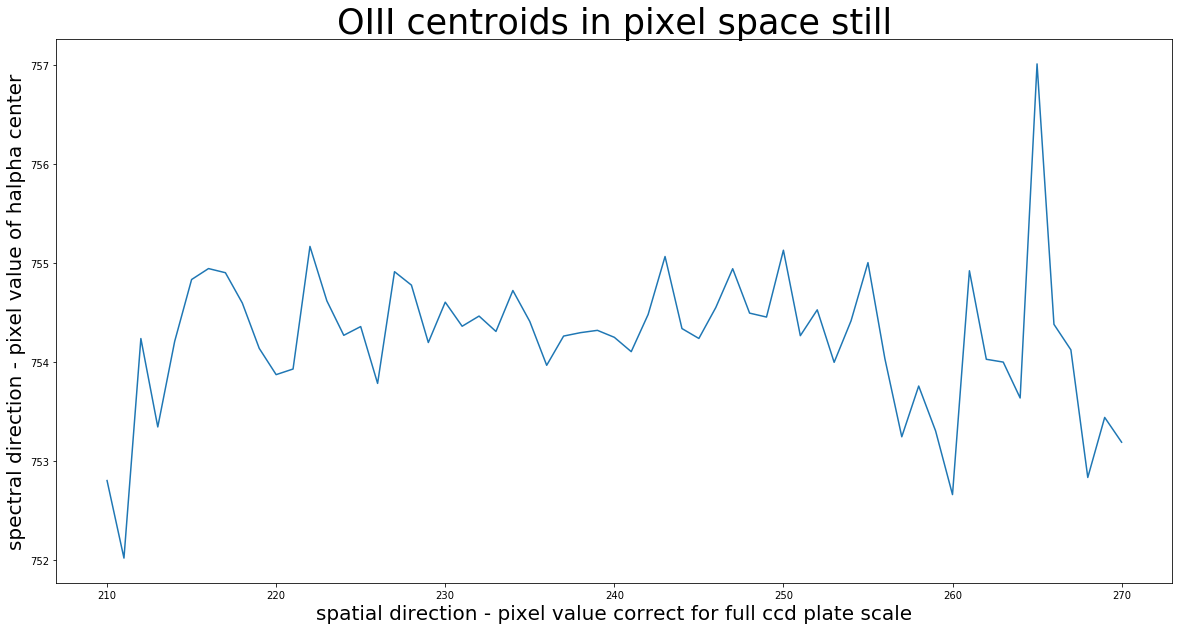

In [32]:
#gets uncertainity from matrix value (still in pixel space)

#taking sqrt of unc to get a true sigma

uncs = np.array(uncs)
print(np.shape(uncs))

sigma_gauss = []
for i in uncs:
    sigma = m.sqrt(abs(i))
    sigma_gauss.append(sigma)
sigma_gauss
print('sigma_gauss',len(sigma_gauss),np.shape(sigma_gauss),sigma_gauss)

#correction for target wl pix's to match index of full ccd plate pix's (still not correct len but dont care about below target pixs-no data there neway)
#1386 correction b/c thats the cut used for new_short when isolating ha due to 10 pix initial cut
wl_pix_corrected = mylist2 + wl_pix_correction + target_wl_range[0] #decide how to better automate/track this
print('wl_pix_corrected defined here')
#dont have to account for osciallations b/c used full ccd plate range b4 wl cut 4 h-alpha isolation
space_pix_correction2 = np.arange(len(mylist2)) + space_pix_correction #centroids

print('mylist2','len=',len(mylist2),type(mylist2), np.shape(mylist2))
print('space_pix_correction2','len=',len(space_pix_correction2),type(space_pix_correction2), np.shape(space_pix_correction2))
print('stddev',np.shape(stddev))
 
    
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('OIII centroids in pixel space still',fontsize=35)
#plt.ylim(1393,1405)

## convert pixs to kpc


In [33]:
target_spacepix_fullccd = np.arange(len(mylist2)) + space_pix_correction
distance_pix_wrtcore_sections = target_spacepix_fullccd - core_from_sections #for core wl using 2 sections around Halpha

#actual converting for loop CENTROIDS pixels to kpc
#good for core defined by 2 sections around halpha

#converts pixels to kpc (distance profile)
arcmins_sections =[]
distances_sections=[]
more_sections = []


#converts pix to kpc and saves as quantity list
for i in distance_pix_wrtcore_sections:
    r_in_arcmin = 1*u.arcmin
    blueplatescale = 0.389*u.arcsec/u.pixel
    dbsp_pix_equiv = u.pixel_scale(blueplatescale)
    r_in_pixel = i*u.pixel
    r_in_arcmin = r_in_pixel.to('arcmin', dbsp_pix_equiv)
    #print(r_in_arcmin)
    distance = 37.7*u.Mpc # distance of object (host) from us
    rad_to_arcmin = (1*u.rad).to('arcmin')
    r_in_kpc = ((r_in_arcmin/rad_to_arcmin)*distance).to("kpc") #gets radians*distancefromus for gal width in kpc
    #print(r_in_kpc)
    more_sections = r_in_kpc #/ (1*u.kpc)
    #print(more_sections)
    distances_sections.append(more_sections.value)
distances_sections = np.array(distances_sections)

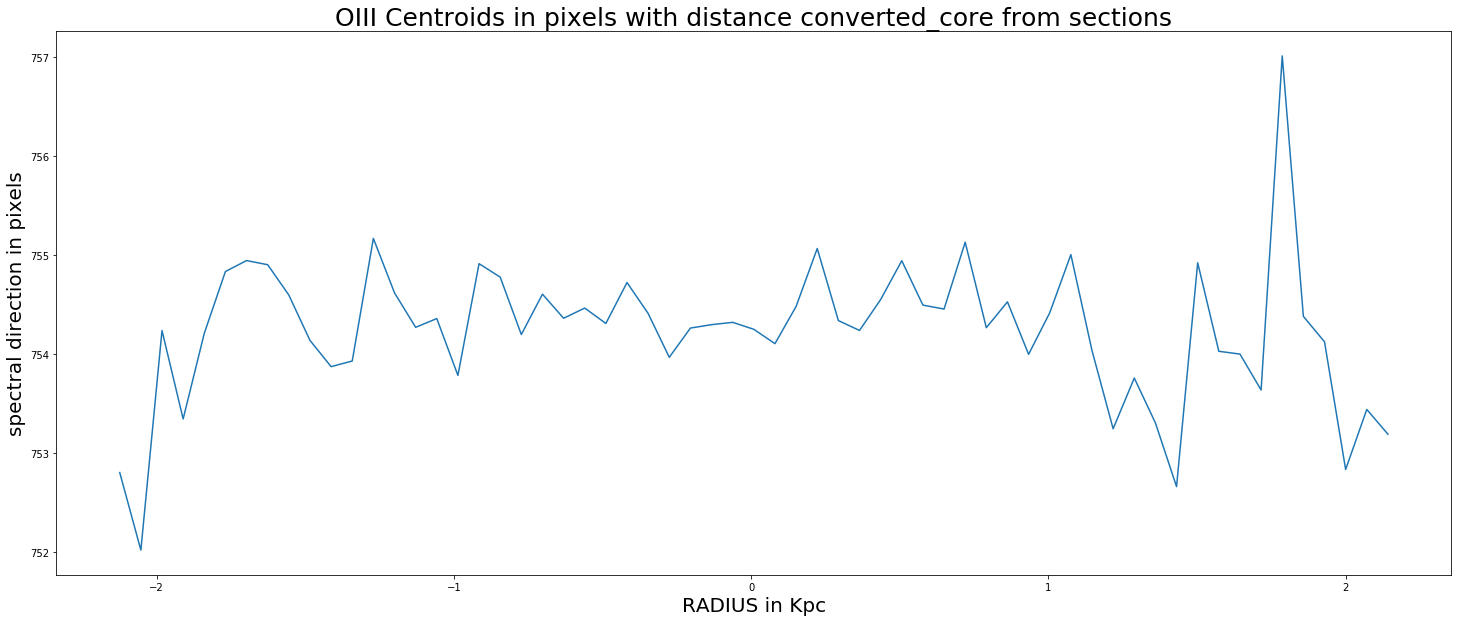

In [34]:
plt.figure(figsize=(25,10))
plt.plot(distances_sections * u.kpc,wl_pix_corrected)
plt.title('OIII Centroids in pixels with distance converted_core from sections',fontsize=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('spectral direction in pixels',fontsize=20)



# convert pixs to velocity with mean of means for spectral core
### First to help calculating host galaxy redshift

In [35]:
#good
#need host z

#calculating z of host
#distance = (c*z)/hubbleconst so need --> (dist * h0) / c = z
distance = 37.7*u.Mpc #host dist from saga paper
H0 = 70 * u.km / u.s / u.Mpc #hubble const
c = const.c.to('km/s') #speed of light
host_z = (distance * H0)/ c 
host_z_vel = ((distance * H0)/ c ) *c

print('StarTrek-host redshift:',host_z)
print('StarTrek-host velocity:',host_z_vel)

wl_rest = 3727*u.angstrom
# host_z = (wl_obs - wl_rest) / wl_rest
wl_observed = (host_z * wl_rest) + wl_rest
print('expected OIII wl redshifted to:',wl_observed)

StarTrek-host redshift: 0.008802756472279233
StarTrek-host velocity: 2639.0 km / s
expected OIII wl redshifted to: 3759.8078733721845 Angstrom


# PROBLEM BELOW, CENTROID WLs  REDSHIFTED TOOOOO MUCH

In [36]:
centroids_wl = ds_blue10.pixtowl(centroid_specpix_fullccd)*u.angstrom
print('here',centroids_wl)
gaussian_wl = ds_blue10.pixtowl(gaussian_specpix_fullccd)*u.angstrom


OIIIcorewl_specpix_fullccd = np.mean(means) + wl_pix_correction + target_wl_range[0] #THIS 105 ISNT CORRECT-THATS SPATIAL NEED SPECTRAL
print(OIIIcorewl_specpix_fullccd)

OIII_core_wl = ds_blue10.pixtowl(OIIIcorewl_specpix_fullccd)*u.angstrom




#velocities NOT relative to the core
v_spec_centroids = (centroids_wl /(3727*u.angstrom) -1) * const.c #centroid velocities
v_spec_gaussians = (gaussian_wl /(3727*u.angstrom) -1) * const.c #gaussian velocities
print('core', OIII_core_wl)
v_core = ((OIII_core_wl/(3727*u.angstrom)) -1) * const.c #core velocity
#print('vccore',v_core,'vspec gauss',np.shape(v_spec_gaussians),'core_wl_sections',core_wl_sections)

#velocities relative to the core from sections
y_axis_Gvelocity = (v_spec_gaussians - v_core).to('km/s')  #gaussian
y_axis_Cvelocity = (v_spec_centroids - v_core).to('km/s') #centroids

print('v_spec_centroids are all negative so thats the problem')
#print(centroids_wl) #these arent true ccd scale yet right?
#print(centroid_specpix_fullccd,'compared to core',Hacorewl_specpix_fullccd)
print(v_spec_centroids)#much better
print('vel of OIII wl "core":',v_core)

here [ 5028.91508003  5029.76505298  5027.35811353  5028.32720362  5027.38860999
  5026.71105467  5026.59093778  5026.63640053  5026.96901377  5027.46570089
  5027.75375521  5027.69216697  5026.34801638  5026.94500533  5027.32265259
  5027.22681923  5027.84993883  5026.62510303  5026.77232733  5027.40177367
  5026.9593565   5027.22331274  5027.11173219  5027.28034993  5026.83156323
  5027.17065607  5027.65145386  5027.33102539  5027.29355552  5027.26818047
  5027.34457368  5027.50182883  5027.09390039  5026.45876618  5027.2486351
  5027.35719365  5027.01841562  5026.5925739   5027.07937875  5027.12249015
  5026.38974708  5027.32672074  5027.04350578  5027.6188009   5027.16362265
  5026.52583679  5027.57795275  5028.43499946  5027.87873502  5028.37080668
  5029.06900599  5026.61501847  5027.58547929  5027.6162617   5028.00972202
  5024.34709247  5027.20234136  5027.4818183   5028.88118173  5028.22295537
  5028.49444587] Angstrom
800.487538422
core 4977.13355269502 Angstrom
v_spec_centro

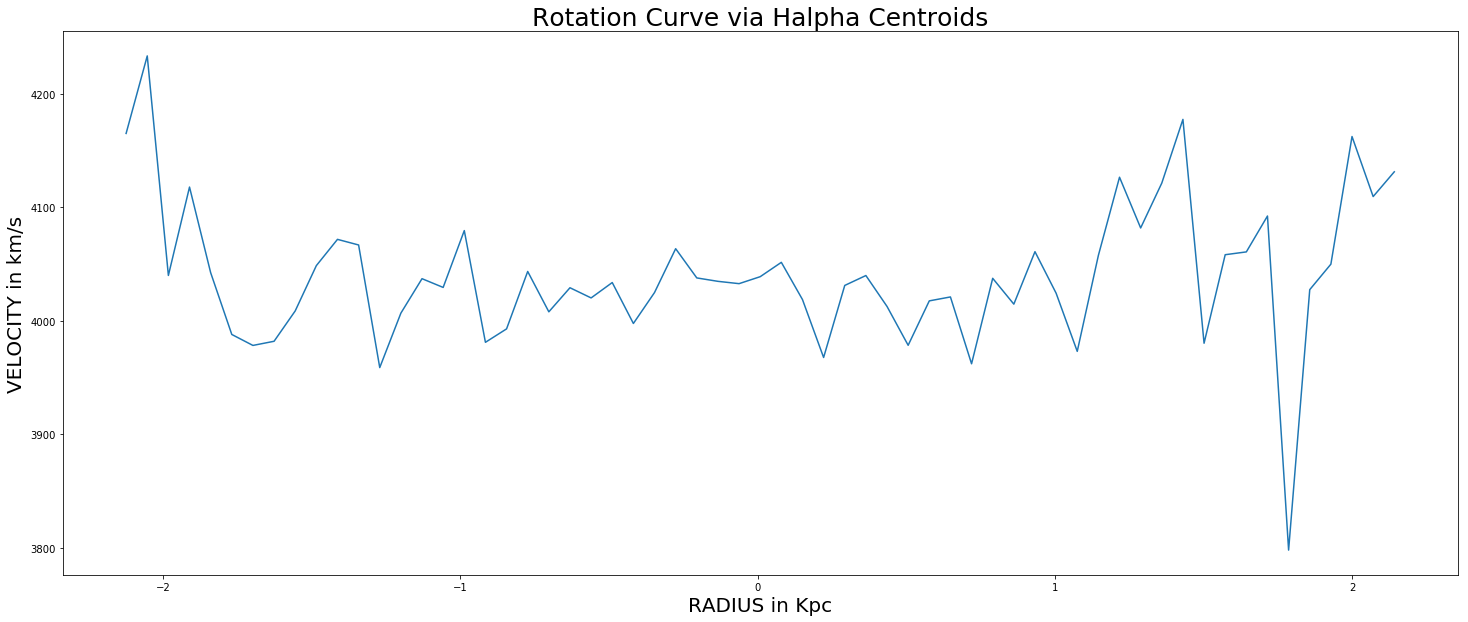

In [37]:
plt.figure(figsize=(25,10))
plt.title('Rotation Curve via Halpha Centroids', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.plot(distances_sections * u.kpc, y_axis_Cvelocity)
#plt.ylim(750,990)

# Spectral Core (aka OIII center wl)

In [38]:
#place all this after the target centroiding for loop

#robust way to clean data
cleaned_means_robustway = sigma_clip(means, sigma=3)
avg_of_gmeans_robustway2 = np.mean(cleaned_means_robustway)
print("robust2:",avg_of_gmeans_robustway2)



#using robust method 2 but also decreasing # of means used when calculating Ha-core-wl 

#first reduce means array length using spatial core pixel as the "center" to zoom in on
endlim = int(core_avgcentroids + 1)
startlim = int(core_avgcentroids - 1)
print(startlim, endlim)

zoomed_in_around_core_means = means[startlim:endlim]


#robust way to clean data
cleaned_zoomed_in_means = sigma_clip(zoomed_in_around_core_means, sigma=3)


#unsure of next steps so gonna do 2 diff methods, keeping track via 1& 2 labels

#2nd method is i believe a core/avg value should come out of sigma clipping
avg_of_zoomed_in_gmeans = np.mean(cleaned_zoomed_in_means)
print("avg_of_zoomed_in_gmeans:",avg_of_zoomed_in_gmeans)

#getting to correct ccd scale -used zoomed data but no correction for that b/c zoomed in spatial axis not spectral
OIIIcorewl_specpix_fullccd_zoomed_in_means = avg_of_zoomed_in_gmeans + wl_pix_correction + target_wl_range[0]

#pass thru ds
OIII_core_wl_fromzoomed_means = ds_blue10.pixtowl(OIIIcorewl_specpix_fullccd_zoomed_in_means)*u.angstrom

print(OIII_core_wl_fromzoomed_means)

robust2: -0.144436679038
28 30
avg_of_zoomed_in_gmeans: -154.866649369
5199.789707188883 Angstrom


## Converts  pix --> velocities with new method spectral core


In [39]:
#velocities NOT relative to the core
#v_spec_centroids = (centroids_wl /(6563*u.angstrom) -1) * const.c #centroid velocities
v_core_fromzoomed_means = ((OIII_core_wl_fromzoomed_means/(3727*u.angstrom)) -1) * const.c #core velocity

#velocities relative to the core from sections
y_axis_Gvelocity_fromzoomed_means = (v_spec_gaussians - v_core_fromzoomed_means).to('km/s')  #gaussian
y_axis_Cvelocity_fromzoomed_means = (v_spec_centroids - v_core_fromzoomed_means).to('km/s')  #centroid


#print('centroid velocities',v_spec_centroids)#much better
print('vel of OIII wl "core" with new method:',v_core_fromzoomed_means)

vel of OIII wl "core" with new method: 118468271.1122231 m / s


In [40]:
''' 
#turning 1d spec into a table to save as fits file
from astropy.table import vstack, Table

ST_1n2_red = Table([flux_ST1n2_red,unc_ST1n2_red], names=('flux','unc'))
ST_1n2_05192017 = vstack(ST_1n2_blue,ST_1n2_red)
#ST_1n2_05192017.write('ST_1n2.fits', format='fits')
'''

" \n#turning 1d spec into a table to save as fits file\nfrom astropy.table import vstack, Table\n\nST_1n2_red = Table([flux_ST1n2_red,unc_ST1n2_red], names=('flux','unc'))\nST_1n2_05192017 = vstack(ST_1n2_blue,ST_1n2_red)\n#ST_1n2_05192017.write('ST_1n2.fits', format='fits')\n"

In [41]:
'''
#testing opening fits file above
from astropy.io import fits
t = fits.open('ST_1n2.fits')
len(t[1].data) #this is the flux, unc table Is this the correct len/wl#?
#t[0].header #not much in there but its there
#basically it works and these files are located in data_pipeline desktop folder

#umm wait wheres the wavelenght info?
'''

"\n#testing opening fits file above\nfrom astropy.io import fits\nt = fits.open('ST_1n2.fits')\nlen(t[1].data) #this is the flux, unc table Is this the correct len/wl#?\n#t[0].header #not much in there but its there\n#basically it works and these files are located in data_pipeline desktop folder\n\n#umm wait wheres the wavelenght info?\n"

# ST-2

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


5 target files located
choose 2D spec for blueside
choose 1D target spec axis limits for blueside


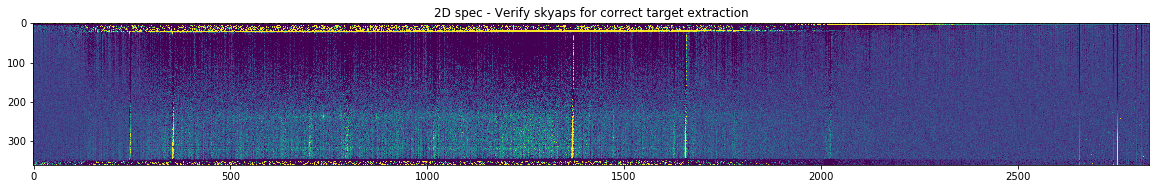

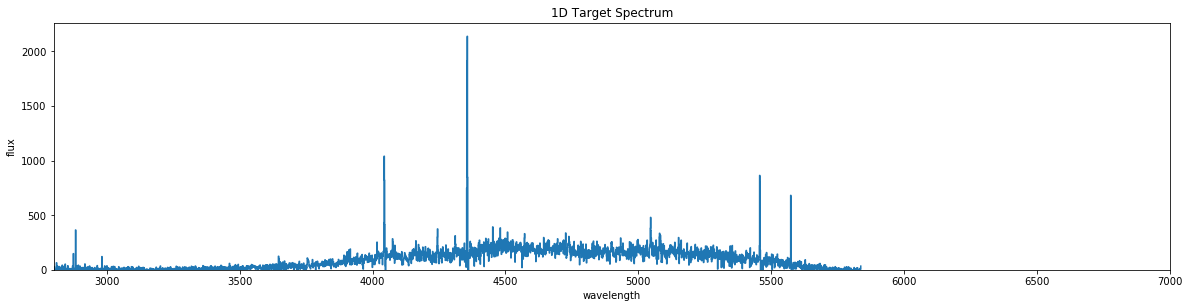

In [42]:
#BLUE

#naming files needed
targetID_blue10_ST2 = '57607497515484-StarTrek'
skyaps_blue10 = [(160,200),(285,355)]
all_side_files_target = 'DoubleSpec/20170519/blue*.fits' #redside
vmax=40
vmin=-10
model='linear'
flatid='DomeFlat'
specaps=(215,250)
flux_ST2,unc_ST2,subimg_ST2 = pipeline.sky_subtract(targetID_blue10_ST2,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
ST_2_blue = Table([flux_ST2,unc_ST2], names=('flux','unc'))



/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


5 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


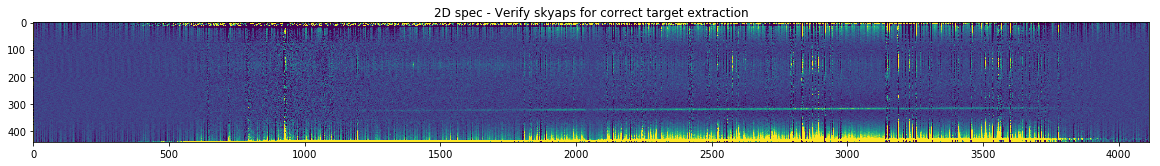

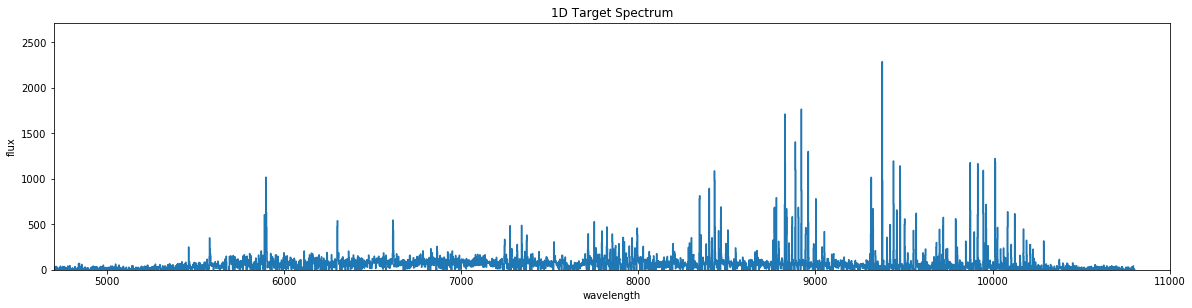

In [43]:
#RED----lots of noise maybe have to ask erik b/c it wont be perfect with wrong ds but this bad?


#this ones interesting b/c the raw files show single skinny spectra (looks like a star) only and pixel locations
#dont match this image produced to determine specaps, target too faint unless stacked and raw vs this inverted
#ie stars spec on raw ~100s, on this ~300s



targetID_red10_ST2 = '57607497515484-StarTrek'
skyaps_red10 = [(75,110),(210,355)]
all_side_files_target = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(130,170)
model=('poly',4)
flux_ST2_red,unc_ST2_red, comb_ST2_red = pipeline.sky_subtract(targetID_red10_ST2,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)

## SD-2

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located
choose 2D spec for blueside
choose 1D target spec axis limits for blueside


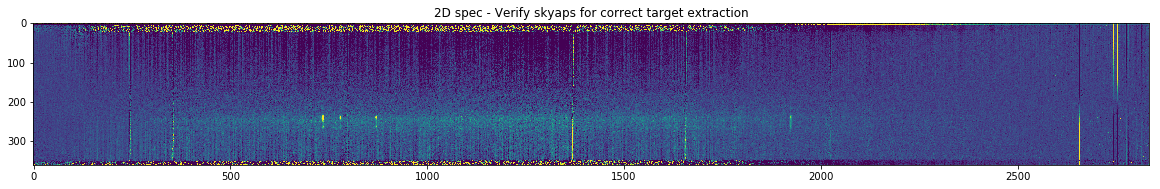

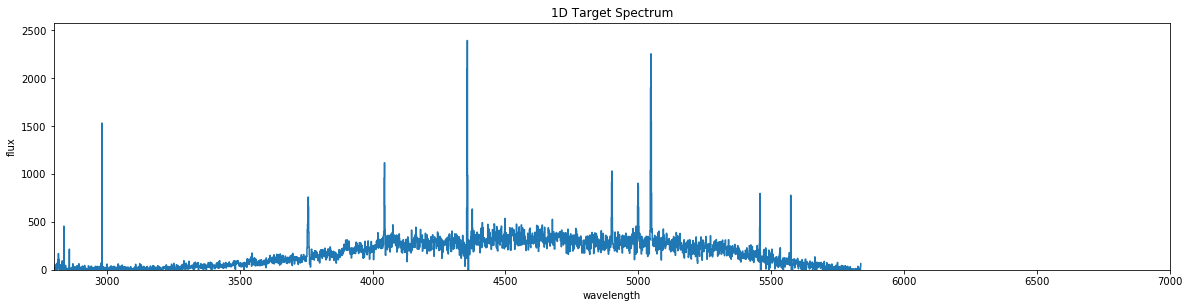

In [44]:
#naming files needed
#BLUE
targetID_blue10 = '68298203070473-ScoobyDoo'
skyaps_blue10 = [(160,200),(295,355)]
all_side_files_target = 'DoubleSpec/20170519/blue*.fits' #redside
specaps=(220,270)
model='linear'

flux_SD2_blue,unc_SD2_blue,comb_SD2_blue = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
SD2_blue = Table([flux_SD2_blue,unc_SD2_blue], names=('flux','unc'))

## SD-2

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


(-500, 2000)

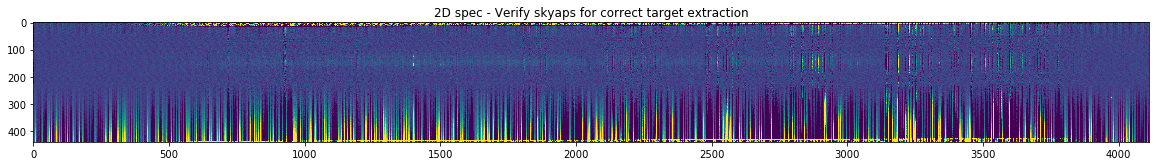

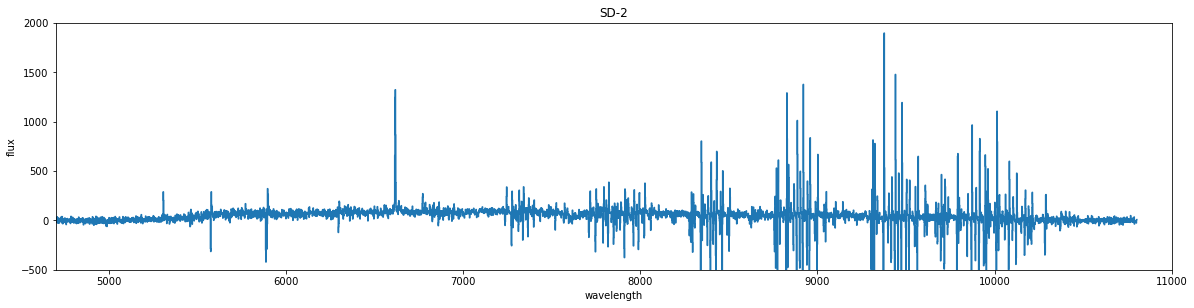

In [45]:
#RED -- WHY is every red side f'ed up?
targetID_red10 = '68298203070473-ScoobyDoo'
skyaps_red10 = [(50,110),(185,230)] #325-390-400 #70-50-30 #205-180 #100-110
all_side_files_target = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(130,170)#(120,160)
model=('cheb',3) #playing but cheb,9 worked best so far

flux_SD2_red,unc_SD2_red,comb_SD2_red = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
plt.title('SD-2')
plt.ylim(-500,2000)

In [46]:
#modeling.models??

In [47]:
#turning 1d spec into a table to save as fits file
SD2_red = Table([flux_SD2_red,unc_SD2_red], names=('flux','unc'))
SD2_05192017 = vstack(SD2_blue,SD2_red)
#SD2_05192017.write('SD2.fits', format='fits')

NameError: name 'vstack' is not defined

# Extracting sky lines and model to improve sky fit to subtract

In [ ]:
#SD2

#tried this but it just searches thru the output of flux and uncertainity
#for model in pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model):
#    print(model)

np.shape(comb_SD2_red.data) #(440,4114) gotta transpose
data_test=comb_SD2_red.data.transpose()
#for i in data_test:
#    print(i)
np.shape(data_test) #shape i want
pipeline_model=data_test[2000] #isolate sky line wavelength
len(pipeline_model)#good

In [ ]:
###SKIP
#model_data2=model_data[2000] #isolating column along a sky emission, model fitted data
#ON SKY LINE

''' 
pipeline_model=data_test[2000] #isolate sky line wavelength
plt.figure(figsize=(20,10))
skyaps=[(30,110),(180,400)] #used from 5/19/17 night for sd-2
x = np.linspace(0, len(pipeline_model), len(pipeline_model*10)) #(4400,)
model_x = np.arange(0,len(pipeline_model))
y = pipeline_model
#yy = np.array([y, y])
p2 = modeling.models.Polynomial1D(4)#, n_models=1)

#pfit = fitting.LinearLSQFitter()
pfit = modeling.fitting.LevMarLSQFitter()

#for i in yy:
#    print(i)
print('model_x',np.shape(model_x))

#print(np.shape(yy))
new_model = pfit(p2, model_x[50:400], y[50:400])#, yy)#, yy)
#print(new_model)
print('new_model',np.shape(new_model))
#plt.xticks(x)
plt.title('blue is raw data, green is model fit line')

plt.plot(model_x,y)#(model_x,y)
plt.plot(x,new_model(x),color='g')#(x,new_model(x),color='g')
plt.ylim(0,50)
#plt.axvline(110,color='r') #end sky ap
#plt.axvline(180,color='g') #begin next sky app
#plt.axvline(50,color='g') #begin sky ap
#plt.axvline(400,color='r') #end next sky app
for lower,upper in skyaps:
    plt.axvline(lower,color='g')
    plt.axvline(upper,color='r')
'''

In [ ]:
#from erik
#ON SKY LINE


#p2 = modeling.polynomial.Legendre1D(3)
#p2 = modeling.models.Polynomial1D(4,c0=1)
p2 = modeling.polynomial.Chebyshev1D(4)
#p2 = modeling.polynomial.Hermite1D(4)

plt.figure(figsize=(20,10))

skyaps=[(50,110),(190,350)] #playing with sizes
#skyaps = [(50,110),(180,400)] #used from 5/19/17 night for sd-2

pfit = modeling.fitting.LevMarLSQFitter()


data = pipeline_model 
x_data = np.arange(len(data))
x_model = np.linspace(0, len(data), 10*len(data))

xfits = []
yfits = []
for lower, upper in skyaps:
    xfits.append(x_data[lower:upper])
    yfits.append(data[lower:upper])
xfit = np.concatenate(xfits)
yfit = np.concatenate(yfits)
new_model = pfit(p2, xfit.astype(float), yfit)

plt.plot(x_data, data) # should be the same as plt.plot(data)
plt.plot(x_model, new_model(x_model))
plt.ylim(0,50)
new_model
for lower,upper in skyaps:
    plt.axvline(lower,color='g')
    plt.axvline(upper,color='r')
plt.title('Looks good just like other test so extracting correcting/ reproduced the pipeline modeling')
#plt.ylim(0,50)

In [ ]:
#from erik
#OFF SKY LINE

#p2 = modeling.models.Polynomial1D(4,c0=1)
#p2 = modeling.polynomial.Legendre1D(3)
p2 = modeling.polynomial.Chebyshev1D(4)
#p2 = modeling.polynomial.Hermite1D(4)

pipeline_model2=data_test[3077] #isolate sky line wavelength
plt.figure(figsize=(20,10))
data = pipeline_model2  
x_data = np.arange(len(data))
x_model = np.linspace(0, len(data), 10*len(data))

xfits = []
yfits = []
for lower, upper in skyaps:
    xfits.append(x_data[lower:upper])
    yfits.append(data[lower:upper])
xfit = np.concatenate(xfits)
yfit = np.concatenate(yfits)
new_model = pfit(p2, xfit.astype(float), yfit)

plt.plot(x_data, data) # should be the same as plt.plot(data)
plt.plot(x_model, new_model(x_model))
plt.ylim(0,50)
new_model
for lower,upper in skyaps:
    plt.axvline(lower,color='r')
    plt.axvline(upper,color='g')

In [ ]:
#SKIP

#TESTing a non-skyline to see if replicate results in checking sky model

pipeline_model2=data_test[3077] #isolate sky line wavelength
#from erik


#p2 = modeling.models.Polynomial1D(4,c0=1)#, n_models=1)
p2 = modeling.polynomial.Legendre1D(20)
#p2 = modeling.polynomial.Chebyshev1D(4)
#p2 = modeling.polynomial.Hermite1D(4)

plt.figure(figsize=(20,10))


data = pipeline_model2  # from your notebook
x_data = np.arange(len(data))
x_model = np.linspace(0, len(data), 10*len(data))

xfits = []
yfits = []
for lower, upper in skyaps:
    xfits.append(x_data[lower:upper])
    yfits.append(data[lower:upper])
xfit = np.concatenate(xfits)
yfit = np.concatenate(yfits)
new_model = pfit(p2, xfit.astype(float), yfit)

plt.plot(x_data, data) # should be the same as plt.plot(data)
plt.plot(x_model, new_model(x_model))
plt.ylim(0,50)
new_model
for lower,upper in skyaps:
    plt.axvline(lower,color='r')
    plt.axvline(upper,color='g')
plt.title('this matches checking sky model notebook')

# end sky subtraction testing


## G-1

In [ ]:
#naming files needed
#BLUE
targetID_blue10 = '65565541728490-Gilgamesh'
skyaps_blue10 = [(160,200),(295,355)]
all_side_files_target = 'DoubleSpec/20170519/blue*.fits' #redside
specaps=(220,270)
model='linear'

flux_G1_blue,unc_G1_blue, comb_G1_blue = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
G1_blue = Table([flux_G1_blue,unc_G1_blue], names=('flux','unc'))

In [ ]:
#RED -- WHY is every red side f'ed up?
targetID_red10 = '65565541728490-Gilgamesh'
skyaps_red10 = [(40,120),(180,400)] #325-400 #50-40 #210-180 #100-120
all_side_files_target = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(130,160)#(140,180)#130,170 #(115,160)#(135,165)
model=('legendre',3)

flux_G1_red,unc_G1_red,comb_G1_red = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
plt.ylim(-100,1000)

In [ ]:
#turning 1d spec into a table to save as fits file
G1_red = Table([flux_G1_red,unc_G1_red], names=('flux','unc'))
G1_05192017 = vstack(G1_blue,G1_red)
#G1_05192017.write('G1.fits', format='fits')

# sky subtraction test on different target

In [ ]:
#G1

np.shape(comb_G1_red.data) #(440,4114) gotta transpose
data_test=comb_G1_red.data.transpose()
#for i in data_test:
#    print(i)
np.shape(data_test) #shape i want
pipeline_model=data_test[3196] #isolate sky line wavelength
len(pipeline_model)#good

In [ ]:
#ON SKY LINE
''' 
pipeline_model=data_test[3196] #isolate sky line wavelength 
plt.figure(figsize=(20,10))
skyaps=[(40,120),(180,400)] #used from 5/19/17 night for sd-2
x = np.linspace(0, len(pipeline_model), len(pipeline_model*10)) #(4400,)
model_x = np.arange(0,len(pipeline_model))
y = pipeline_model

p2 = modeling.models.Polynomial1D(3)
#p2 = modeling.polynomial.Legendre1D(20)
#p2 = modeling.polynomial.Chebyshev1D(4)
#p2 = modeling.polynomial.Hermite1D(4)

#pfit = fitting.LinearLSQFitter()
pfit = modeling.fitting.LevMarLSQFitter()

#for i in yy:
#    print(i)
print('model_x',np.shape(model_x))

#print(np.shape(yy))
new_model = pfit(p2, model_x[50:400], y[50:400])#, yy)#, yy)
#print(new_model)
print('new_model',np.shape(new_model))
#plt.xticks(x)
plt.title('blue is raw data, green is model fitted')

plt.plot(model_x,y)#(model_x,y)
plt.plot(x,new_model(x),color='g')#(x,new_model(x),color='g')
plt.ylim(-10,100)
for lower,upper in skyaps:
    plt.axvline(lower,color='g')
    plt.axvline(upper,color='r')
'''

In [ ]:
#from erik
#ON SKY LINE

#p2 = modeling.models.Polynomial1D(3)#, n_models=1)
p2 = modeling.polynomial.Legendre1D(3)
#p2 = modeling.polynomial.Chebyshev1D(3)
#p2 = modeling.polynomial.Hermite1D(4)
skyaps=[(40,120),(180,400)] #used from 5/19/17 night for sd-2

plt.figure(figsize=(20,10))
pipeline_model = data_test[3196]
data = pipeline_model  # from your notebook
x_data = np.arange(len(data))
x_model = np.linspace(0, len(data), 10*len(data))

xfits = []
yfits = []
for lower, upper in skyaps:
    xfits.append(x_data[lower:upper])
    yfits.append(data[lower:upper])
xfit = np.concatenate(xfits)
yfit = np.concatenate(yfits)
new_model = pfit(p2, xfit.astype(float), yfit)

plt.plot(x_data, data) # should be the same as plt.plot(data)
plt.plot(x_model, new_model(x_model))
#plt.ylim(-10,10)
#new_model
for lower,upper in skyaps:
    plt.axvline(lower,color='g')
    plt.axvline(upper,color='r')
plt.ylim(-10,100)

In [ ]:
#OFF SKY LINE
#from erik

#p2 = modeling.models.Polynomial1D(3)#, n_models=1)
p2 = modeling.polynomial.Legendre1D(3)
#p2 = modeling.polynomial.Chebyshev1D(3)
#p2 = modeling.polynomial.Hermite1D(3)
skyaps=[(40,120),(180,400)] #used from 5/19/17 night for sd-2


plt.figure(figsize=(20,10))
pipeline_model = data_test[3452]
data = pipeline_model  # from your notebook
x_data = np.arange(len(data))
x_model = np.linspace(0, len(data), 10*len(data))

xfits = []
yfits = []
for lower, upper in skyaps:
    xfits.append(x_data[lower:upper])
    yfits.append(data[lower:upper])
xfit = np.concatenate(xfits)
yfit = np.concatenate(yfits)
new_model = pfit(p2, xfit.astype(float), yfit)

plt.plot(x_data, data) # should be the same as plt.plot(data)
plt.plot(x_model, new_model(x_model))
#plt.ylim(-10,10)
#new_model
for lower,upper in skyaps:
    plt.axvline(lower,color='g')
    plt.axvline(upper,color='r')
plt.ylim(-10,100)

## ODY-3

In [ ]:
#62698115432544-Odyssey
#naming files needed
#BLUE
targetID_blue10 = '62698115432544-Odyssey'
skyaps_blue10 = [(160,200),(295,355)]
all_side_files_target = 'DoubleSpec/20170519/blue*.fits' #redside
specaps=(215,250)
model='linear'

flux_ody3_blue,unc_ody3_blue,subimg_Ody3_blue = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
ody3_blue = Table([flux_ody3_blue,unc_ody3_blue], names=('flux','unc'))

In [ ]:
plt.plot(,flux_ody3_blue)

In [ ]:
#RED -- WHY is every red side f'ed up?
targetID_red10 = '62698115432544-Odyssey'
skyaps_red10 = [(50,100),(210,325)]
all_side_files_target = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(125,170)#(145,165)#(150,170)#(145,175)
model=('poly',3)

flux_ody3_red,unc_ody3_red,comb_Ody3_red = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
plt.ylim(-500,1000)

In [ ]:
flux_ody3_red,unc_ody3_red 

In [ ]:
#turning 1d spec into a table to save as fits file
ody3_red = Table([flux_ody3_red,unc_ody3_red], names=('flux','unc'))
ody3_05192017 = vstack(ody3_blue,ody3_red)
#ody3_05192017.write('ody3.fits', format='fits')

## ody-8

In [ ]:
#BLUE


#idk what is the prob - seeing was ~1.6, 1.o is good so that doesnt seem terribly far off
#whats large blob b/c it moved up when i changed skyaps from 200 to 295
#cant seem to isolate small spec in ~200s with specaps but looks skinny like star neways maybe


targetID_blue10 = '62224092496776-Odyssey'
skyaps_blue10 = [(100,200),(300,340)]#[(60,140),(295,355)]
all_side_files_target = 'DoubleSpec/20170519/blue*.fits' #redside
specaps=(275,295)#(225,250)#(270,290)
model=('legendre',3)

flux_ody8_blue,unc_ody8_blue,comb_Ody8_blue = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
ody8_blue = Table([flux_ody8_blue,unc_ody8_blue], names=('flux','unc'))
plt.ylim(-100,380)
plt.xlim(2850,6000)

In [ ]:
#RED -- WHY is every red side f'ed up?
targetID_red10 = '62224092496776-Odyssey'
skyaps_red10 = [(50,125),(180,240)]#[(40,120),(260,400)]#325-400 #200-260 to avoid star #70-40 #100-120 star is 249-259
all_side_files_target = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(130,170)#(145,170)#130-145-150 #170-175badmove-165badmove maybe starts at 140
model=('legendre',3)

flux_ody8_red,unc_ody8_red,comb_ody8_red = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
#plt.ylim(-500,650)
plt.title('ODY-8-red')

In [ ]:
#turning 1d spec into a table to save as fits file
ody8_red = Table([flux_ody8_red,unc_ody8_red], names=('flux','unc'))
ody8_05192017 = vstack(ody8_blue,ody8_red)
#ody8_05192017.write('ody8.fits', format='fits')

### checking sky subtract for ody8

In [ ]:
#ODY 8

np.shape(comb_ody8_red.data) #(440,4114) gotta transpose
data_test=comb_ody8_red.data.transpose()

np.shape(data_test) #shape i want
pipeline_model=data_test[3196] #isolate sky line wavelength
len(pipeline_model)#good

In [ ]:
#from erik
#ON SKY LINE


#p2 = modeling.polynomial.Legendre1D(3)
p2 = modeling.models.Polynomial1D(6)
#p2 = modeling.polynomial.Chebyshev1D(4)
#p2 = modeling.polynomial.Hermite1D(4)

plt.figure(figsize=(20,10))

skyaps=[(50,125),(180,240)] #playing with sizes
#skyaps = [(40,125),(180,240)] #used from 5/19/17 night for G1
#[(40,120),(260,400)]#325-400 #200-260 to avoid star #70-40 #100-120 star is 249-259


pfit = modeling.fitting.LevMarLSQFitter()

pipeline_model=data_test[1369] #isolate sky line wavelength
data = pipeline_model 
x_data = np.arange(len(data))
x_model = np.linspace(0, len(data), 10*len(data))

xfits = []
yfits = []
for lower, upper in skyaps:
    xfits.append(x_data[lower:upper])
    yfits.append(data[lower:upper])
xfit = np.concatenate(xfits)
yfit = np.concatenate(yfits)
new_model = pfit(p2, xfit.astype(float), yfit)

plt.plot(x_data, data) # should be the same as plt.plot(data)
plt.plot(x_model, new_model(x_model))
plt.ylim(0,50)
new_model
for lower,upper in skyaps:
    plt.axvline(lower,color='g')
    plt.axvline(upper,color='r')

In [ ]:
#OFF SKY LINE
#from erik


#p2 = modeling.polynomial.Legendre1D(3)
p2 = modeling.models.Polynomial1D(6)
#p2 = modeling.polynomial.Chebyshev1D(4)
#p2 = modeling.polynomial.Hermite1D(4)

plt.figure(figsize=(20,10))

#skyaps=[(50,110),(190,350)] #playing with sizes
skyaps = [(40,125),(180,240)] #used from 5/19/17 night for G1
#[(40,120),(260,400)]#325-400 #200-260 to avoid star #70-40 #100-120 star is 249-259


pfit = modeling.fitting.LevMarLSQFitter()

pipeline_model=data_test[1418] #isolate sky line wavelength
data = pipeline_model 
x_data = np.arange(len(data))
x_model = np.linspace(0, len(data), 10*len(data))

xfits = []
yfits = []
for lower, upper in skyaps:
    xfits.append(x_data[lower:upper])
    yfits.append(data[lower:upper])
xfit = np.concatenate(xfits)
yfit = np.concatenate(yfits)
new_model = pfit(p2, xfit.astype(float), yfit)

plt.plot(x_data, data) # should be the same as plt.plot(data)
plt.plot(x_model, new_model(x_model))
plt.ylim(0,50)
new_model
for lower,upper in skyaps:
    plt.axvline(lower,color='g')
    plt.axvline(upper,color='r')

## OB-3 ----WHERE IS IT???(BLUE side only) this might be a no optical obs
### had note that very close to moon so thats prob why none

In [ ]:
#BLUE
targetID_blue10 = '79996084617517-OBrother'
skyaps_blue10 = [(60,210),(275,330)]#[(50,100),(220,240)] #avoid star at 216 #(220,230)
all_side_files_target = 'DoubleSpec/20170519/blue*.fits' #redside
specaps=(220,255)#(235,270) #maybe 235-275?
model = 'linear'

flux_OB3_blue,unc_OB3_blue,subimg_OB3_blue = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
OB3_blue = Table([flux_OB3_blue,unc_OB3_blue], names=('flux','unc'))

In [ ]:
#RED 
targetID_red10 = '79996084617517-OBrother'
skyaps_red10 = [(70,100),(200,325)]
all_side_files_target = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(120,180)
model=('poly',3)
#check raw files for b3tter specaps


flux_OB3_red,unc_OB3_red,subimg_OB3_red = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)

In [ ]:
#turning 1d spec into a table to save as fits file
OB3_red = Table([flux_OB3_red,unc_OB3_red], names=('flux','unc'))
OB3_05192017 = vstack(OB3_blue,OB3_red)
#OB3_05192017.write('OB3.fits', format='fits')

## OB-2

In [ ]:
#80066954264778-OBrother
#BLUE
#to check target ID 'name'
# = fits.open('DoubleSpec/20170519/blue0120.fits')
#t[0].header
#800669654264778-OBrother ## this is id used in fits file but its wrong. has extra 6
targetID_blue10 = '800669654264778-OBrother'
skyaps_blue10 = [(40,180),(250,300)]#[(30,120),(205,300)]#[(160,200),(295,355)]
all_side_files_target = 'DoubleSpec/20170519/blue*.fits' #redside
specaps=(210,240)
model=('poly',4)

flux_OB2_blue,unc_OB2_blue,subimg_OB2_blue = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
OB2_blue = Table([flux_OB2_blue,unc_OB2_blue], names=('flux','unc'))

In [ ]:
#RED -- WHY is every red side f'ed up?
targetID_red10 = '800669654264778-OBrother'
skyaps_red10 = [(70,100),(200,325)]
all_side_files_target = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(210,230)
model=('poly',4)



flux_OB2_red,unc_OB2_red,subimg_OB2_red = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)


In [ ]:
#turning 1d spec into a table to save as fits file
OB2_red = Table([flux_OB2_red,unc_OB2_red], names=('flux','unc'))
OB2_05192017 = vstack(OB2_blue,OB2_red)
#OB2_05192017.write('OB2.fits', format='fits')

In [ ]:
t=fits.open('DoubleSpec/20170519/red0121.fits')
t[0].header